In [9]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns

In [26]:
print(':wow')

:wow


In [ ]:
all_data = pd.read_excel("teleco_excel_file.xlsx")
# all_data.head()
# pd.set_option('display.max_columns', 50)

In [46]:
# all_data.columns.tolist()

In [ ]:
print(f" There are {all_data.shape[0]} rows and {all_data.shape[1]} columns")

##### Dealing with missing values

In [ ]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telco dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(all_data)

#### showing the missing columns

In [28]:
# Now which column(s) has missing values
# all_data.isna().sum()

In [47]:
fd = pd.DataFrame(all_data)
fd.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
df = fd.drop(['IMSI', 'IMEI','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'], axis=1)

In [ ]:
df.iloc[:5 , 0:10]

In [ ]:
df.iloc[:5 , 0:20]

In [ ]:
df.iloc[:5 , 20:50]

### Handset type and manufacures

In [ ]:
ht = df["Handset Type"].value_counts()
ht.head(10)

In [ ]:
hm = df["Handset Manufacturer"].value_counts()
hm.head(3)

In [ ]:
Manu_grp = df.groupby(["Handset Manufacturer"])
Manu_grp.get_group('Apple').iloc[:1 , 20:40]

In [ ]:
Manu_grp['Handset Type'].value_counts().loc['Apple'].head(5)

In [ ]:
Manu_grp['Handset Type'].value_counts().loc['Samsung'].head(5)

In [ ]:
Manu_grp['Handset Type'].value_counts().loc['Huawei'].head(5)

### interpretation and recommendation to marketing teams
The data between Handset Manufacturer and Handset Type shows that most of the users from the sample data use the manufacturer Apple product


In [ ]:
df["MSISDN/Number"].value_counts()

In [ ]:
User_grp = df.groupby(["MSISDN/Number"])
# User_grp.get_group('3.362632e+10')

In [ ]:
User_grp['Bearer Id'].value_counts()

In [ ]:
User_grp['Bearer Id'].median()

In [ ]:
User_grp['Bearer Id'].mean()

In [ ]:
User_grp["MSISDN/Number"].agg(['median', 'mean'])

In [ ]:
User_grp['Dur. (ms)'].value_counts()

### the total data volume (in Bytes) during this session for each application


In [ ]:
Users_grp = df.groupby(["MSISDN/Number", "Social Media DL (Bytes)" , 'Google DL (Bytes)', 'Email DL (Bytes)' ,'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)'])

In [ ]:
Users_grp['Total UL (Bytes)'].value_counts().head(5)

In [ ]:
Users_grp['Total DL (Bytes)'].value_counts().head(5)

In [ ]:
df.describe()

## Data Exploration

In [ ]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


###Univariate Analysis

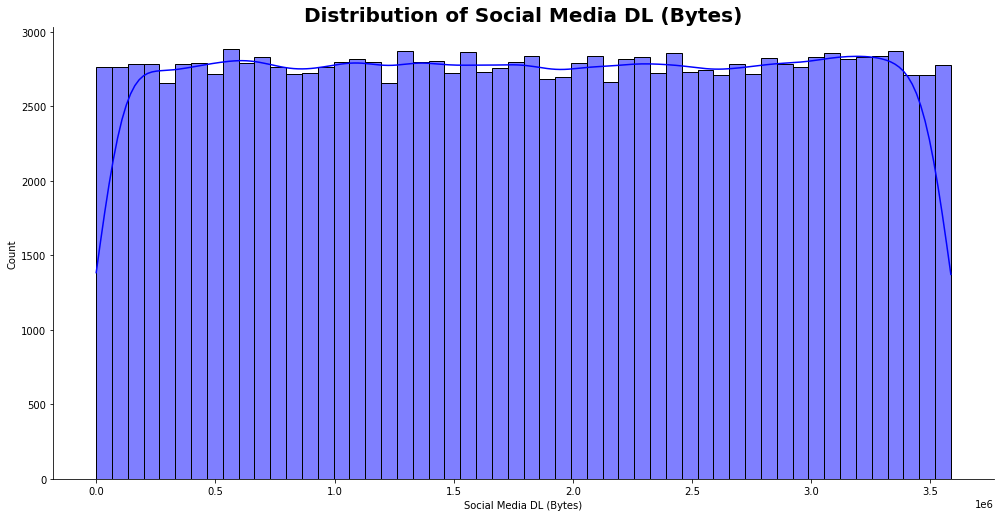

In [45]:
plot_hist(df, "Social Media DL (Bytes)", "blue")

In [ ]:
df["Social Media DL (Bytes)"].describe()

In [ ]:
plot_hist(df, "Google DL (Bytes)", "blue")

In [ ]:
sns.countplot(df['Google DL (Bytes)'])
plt.show()

In [ ]:
plot_count(df['Google DL (Bytes)'])

In [ ]:
plot_box(df, "Social Media DL (Bytes)", 'Social Media DL (Bytes) Outliers')

In [ ]:
# plot_box(df, "num_medications", "number of medications outliers")

## catagorical variables